In [33]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os
import imghdr

In [10]:
# Limiting tensorflow on GPU usage
gpus = tf.config.experimental.list_physical_devices("GPU")
for i in gpus:
    tf.config.experimental.set_memory_growth(i, True)

## Cleaning data from bad image format

In [13]:
images_folder = "images"

In [12]:
image_ext = ["jpg", "png", "bmp", "jpeg"]

In [25]:
for image_class in os.listdir(images_folder):
    if not image_class == ".DS_Store":
        for image in os.listdir(os.path.join(images_folder,image_class)):
            img_path = os.path.join(images_folder, image_class, image)
            
            try:
                img = cv2.imread(img_path)
                ext = imghdr.what(img_path) # gets the file extenstion

                if not ext in image_ext:
                    print(f"Image extenstion is bad: {img_path}")
                    os.remove(img_path)
            except:
                print(f"Image could not be open: {img_path}")
                os.remove(img_path)

In [29]:
img = cv2.imread(os.path.join(images_folder, "happy", "1HEoLBLidT2u4mhJ0oiDgig.png"))
img

array([[[241, 249, 255],
        [241, 249, 255],
        [241, 249, 255],
        ...,
        [236, 244, 254],
        [236, 244, 254],
        [236, 244, 254]],

       [[241, 249, 255],
        [241, 249, 255],
        [240, 248, 255],
        ...,
        [235, 243, 253],
        [236, 244, 254],
        [236, 244, 254]],

       [[241, 249, 255],
        [241, 249, 255],
        [240, 248, 255],
        ...,
        [235, 243, 253],
        [236, 244, 254],
        [236, 244, 254]],

       ...,

       [[ 53,  87, 100],
        [ 60,  94, 106],
        [ 65, 100, 111],
        ...,
        [ 54,  89,  86],
        [ 57,  94,  91],
        [ 57,  93,  92]],

       [[ 70, 105, 117],
        [ 63,  97, 108],
        [ 63,  98, 108],
        ...,
        [ 56,  91,  90],
        [ 54,  90,  88],
        [ 52,  87,  89]],

       [[ 56,  90, 104],
        [ 66, 100, 114],
        [ 62,  96, 108],
        ...,
        [ 55,  89,  91],
        [ 54,  89,  90],
        [ 57,  92,  97]]

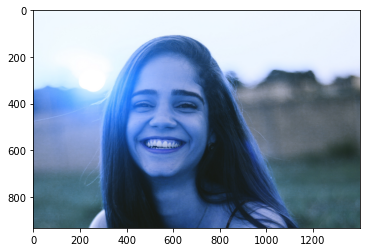

In [31]:
plt.imshow(img)

# Creating a dataframe of images

In [78]:
# getting our images as a dataset 
data = tf.keras.utils.image_dataset_from_directory(images_folder, batch_size=16)

Found 139 files belonging to 2 classes.


In [79]:
# Creating an iterator for our data
data_iterator = data.as_numpy_iterator()
data_iterator

In [80]:
# Actually getting the data
batch = data_iterator.next()
# bach[0] is features, batch[1] is labels

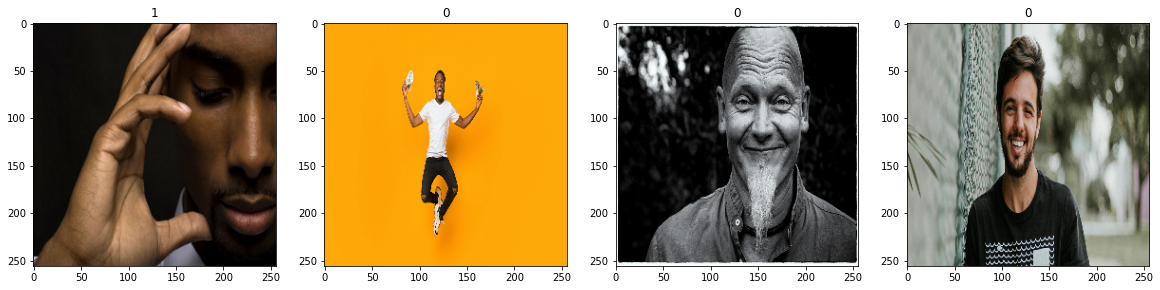

In [81]:
# Plotting images to see how they are labeled
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for i, img in enumerate(batch[0][:4]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(batch[1][i])

# 0 is happy
# 1 is sad

# Data Preprocessing

In [82]:
# Scaling our images, so that they are from 0.0 to 1.0 (done for performance purposes)
data = data.map(lambda x,y: (x/255, y))

In [84]:
batch = data.as_numpy_iterator().next()
batch[0].max()

1.0

## Splitting our data

In [93]:
# Getting the right size for our data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

9

In [98]:
# Actually splitting our data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)